<a href="https://colab.research.google.com/github/vicaleram/DSPS_VRamirez/blob/master/HW7/HW7VRAMIREZLPart1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Written by FBB for DSPS 2019
# HW 7

# **PART** I Due Tuesday 10/22 at midnight

Read in the abstract, first paragaph of the main text and page three of [Nam et al. 2018](https://arxiv.org/pdf/1811.10212.pdf) which should be sufficient to give you an idea of the problem context., 

# 1 Get the data 
from the Harvard Dataverse open data repository (well curated and organized open data repositories are a blessing in science and data science - they enable reproducibility! - This one is a great one.)

Use ```wget``` and the link in the paper (page 17). YOu want the data for Fig 1 insert G.


In [3]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scipy as sp
from scipy import stats
import statsmodels.api as sm
from statsmodels import graphics
from statsmodels.formula import api as smf
from scipy.optimize import minimize


In [0]:
#!wget https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/9QKJU2/WOMIZQ

In [0]:
#mv :persistentId?persistentId=doi:10.7910%2FDVN%2F9QKJU2%2FWOMIZQ "drive/My Drive/dsps"

In [0]:
#cd "drive/My Drive/dsps"

In [0]:
#mv ':persistentId?persistentId=doi:10.7910%2FDVN%2F9QKJU2%2FWOMIZQ' fig1datag.txt

In [0]:
#ls

In [0]:
nam18 = pd.read_csv('drive/My Drive/dsps/fig1datag.txt',sep = '\t', header = None)

In [11]:
nam18.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.247,0.000000,0.114,--,1.998,-0.6682,0.236,--,NaN,0.0,0.000000
1,0.270,0.264431,0.291,--,3.008,0.0000,1.640,0,NaN,1.0,0.000163
2,0.290,0.247896,0.290,--,4.013,1.1170,2.500,0.2,NaN,1.5,0.007934
3,0.330,0.232262,0.330,--,5.006,2.4760,3.999,1.538,NaN,2.0,0.058189
4,0.379,0.233420,0.380,--,6.015,4.4130,5.000,2.866,NaN,2.5,0.198115


# Data Wrangling and visualization



Write *a single line of code* that does the following (in whichever order you want):

- removes all columns you do not need. 
- removes Nan values that appear in the relevant columns.
- renames the columns according to the notation on in the paper figure (Fig 1 insert G)

Writing this in a single line of code is the "pythonic" way to do it - meaning its in the conding style of the language. You can do it by concatenating methods that do wach step, like ```df.method1(...).method2(...).method3(...)```
and as long as each method returns a dataframe another method can be appended. The code will be run left to right with the next method running on the dataframe returned by the previous one.

Note that you can use latex notation for the lables, e.g.:
```str=r"\Delta^2"```
would look like what you wrote when you look at the column names, but would look like 

$\Delta^2$ 

in the plot label if plotting with df.plot()



In [12]:
tstr = r'$T\ (K)$'
nstr = r'$n^*(10^9cm^2)$'

#defining our new dataset in a single line

nam18reduced = ((nam18[[0, 1]]).rename(columns={0:tstr, 1 :nstr})).dropna()
nam18reduced.head()

,$T\ (K)$,$n^*(10^9cm^2)$
0,0.247,0.000000
1,0.270,0.264431
2,0.290,0.247896
3,0.330,0.232262
4,0.379,0.233420


Text(0.5, 1.0, 'Conduction Band Electron Density')

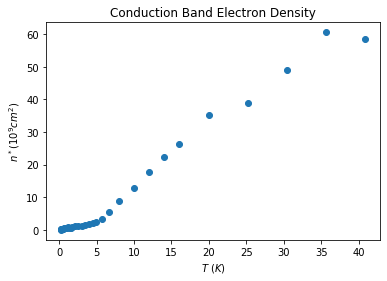

In [13]:
pl.scatter(nam18reduced[tstr], nam18reduced[nstr])
pl.xlabel(tstr)
pl.ylabel(nstr)
pl.title('Conduction Band Electron Density')

**Figure 1:** The density of electrons present in the conduction band for
various thicknesses of charge-neutral graphene multilayers. No distinction is
made between the thicknesses of the multilayers in this plot.

# 677 and Extra Credit

Create a function that generates a polynomial of any degree.

Functions can take variable number of arguments if passed as a tuple with a * (this is a pointer. If you coded in C you know this syntax.)

What I mean by that is that I can create a function as:


In [0]:
def anypol(x, *coeffs):
    """
    given some { x = [x1,x2,x3,x4,x5], a, b, c, d ... } anypol returns
    a + b x + c x^2 + d x^3 + ... as an array


    x is some array or list of values.

    a, b, c, d, ... are coefficients of the polynomial in increasing degree
    """
    
    func = 0
    for i in range(len(coeffs)):
      
        func += coeffs[i] * np.power(x, i)
    return func        

So based on this create a function that takes the _x_ vector (exogenous variable) and a pointer to n coefficients. Those will be the parameters of the polynomial and it will be a list of 2 elements for a line (slope and intercept), of 3 elements for a second degree polynomial, 4 for a third etc etc. Fit this with scipy.optimize.curve_fit fitting a polynomial of 1st (line), 2nd (parabola), and 3rd degree.

# 3 Model

Use the statsmodels.formula.api package to run Ordinary Linear Fits (ols) and fit a line, a second degree polynomial and a third degree polynomial to the data. For each model extract the log-likelihood and print it out explicitally for each mode. How do the lof-likelihoods compare for the three models? does it make sense? explain. Just by reading the log-likelihood value can you say which model is better? Discuss

Note: if you followed the instructions and renamed variables as I asked you to above, you will encounter an issue here, Although pandas know how to render the string in the plot, statsmodels has issues with parsing a complex string with characters such as "(" or latex inputs.

In [15]:
model1 = smf.ols('nam18reduced[nstr] ~ nam18reduced[tstr]', data=nam18reduced).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     nam18reduced[nstr]   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 25 Oct 2019   Prob (F-statistic):           2.03e-30
Time:                        22:53:54   Log-Likelihood:                -78.878
No. Observations:                  35   AIC:                             161.8
Df Residuals:                      33   BIC:                             164.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.8884      0.492     -3.841      0.001      -2.889      -0.888
nam18reduced[tstr]     1.6176      0.038     42.577      0.000       1.540       1.695
==============================================================================
Omnibus:                        1.418   Durbin-Watson:                   0.845
Prob(Omnibus):                  0.492   Jarque-Bera (JB):                1.041
Skew:                          -0.420   Prob(JB):                        0.594
Kurtosis:                       2.905   Cond. No.                         15.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
model1.params

Intercept            -1.888445
nam18reduced[tstr]    1.617586
dtype: float64

In [17]:
model1.llf

-78.87784843905396

In [18]:
model2 = smf.ols('nam18reduced[nstr] ~ np.power(nam18reduced[tstr],2) + nam18reduced[tstr]', data=nam18reduced).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     nam18reduced[nstr]   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     879.5
Date:                Fri, 25 Oct 2019   Prob (F-statistic):           1.08e-28
Time:                        22:53:54   Log-Likelihood:                -78.866
No. Observations:                  35   AIC:                             163.7
Df Residuals:                      32   BIC:                             168.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -1.9344      0.592     -3.266      0.003      -3.141      -0.728
np.power(nam18reduced[tstr], 2)    -0.0005      0.004     -0.144      0.886      -0.008       0.007
nam18reduced[tstr]                  1.6354      0.129     12.652      0.000       1.372       1.899
==============================================================================
Omnibus:                        1.219   Durbin-Watson:                   0.835
Prob(Omnibus):                  0.544   Jarque-Bera (JB):                0.984
Skew:                          -0.399   Prob(JB):                        0.611
Kurtosis:                       2.809   Cond. No.                         608.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
model2.params

Intercept                         -1.934427
np.power(nam18reduced[tstr], 2)   -0.000520
nam18reduced[tstr]                 1.635370
dtype: float64

In [20]:
model3 = smf.ols('nam18reduced[nstr] ~ np.power(nam18reduced[tstr],3) +np.power(nam18reduced[tstr],2) + nam18reduced[tstr]', data=nam18reduced).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     nam18reduced[nstr]   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     1433.
Date:                Fri, 25 Oct 2019   Prob (F-statistic):           2.54e-33
Time:                        22:53:54   Log-Likelihood:                -62.858
No. Observations:                  35   AIC:                             133.7
Df Residuals:                      31   BIC:                             139.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -0.4186      0.441     -0.949      0.350      -1.318       0.481
np.power(nam18reduced[tstr], 3)    -0.0015      0.000     -6.811      0.000      -0.002      -0.001
np.power(nam18reduced[tstr], 2)     0.0827      0.012      6.649      0.000       0.057       0.108
nam18reduced[tstr]                  0.5900      0.175      3.380      0.002       0.234       0.946
==============================================================================
Omnibus:                        3.084   Durbin-Watson:                   1.326
Prob(Omnibus):                  0.214   Jarque-Bera (JB):                1.813
Skew:                          -0.397   Prob(JB):                        0.404
Kurtosis:                       3.784   Cond. No.                     2.64e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
model3.params

Intercept                         -0.418619
np.power(nam18reduced[tstr], 3)   -0.001506
np.power(nam18reduced[tstr], 2)    0.082687
nam18reduced[tstr]                 0.589994
dtype: float64

In [22]:
print("The linear model's log-likelihood:\t{:0.5f}".format(model1.llf))
print("The quadratic model's log-likelihood:\t{:0.5f}".format(model2.llf))
print("The cubic model's log-likelihood:\t{:0.5f}".format(model3.llf))

The linear model's log-likelihood:	-78.87785
The quadratic model's log-likelihood:	-78.86649
The cubic model's log-likelihood:	-62.85756


# 4 plot the three models over the data. Use the polynomial function you created in the 667/EC if you did. 
Make sure you create a new x vector that samples densely the range spanned by the temperature variabla in your data, or your models, which should be plotted with lines, will look broken-up

In [0]:
#defining our linear, cuadratic and cubic fits to plot them 
lopt, lcov = sp.optimize.curve_fit(anypol, nam18reduced[tstr], nam18reduced[nstr], p0=[1,1])
qopt, qcov = sp.optimize.curve_fit(anypol, nam18reduced[tstr], nam18reduced[nstr], p0=[1,1,1])
copt, ccov = sp.optimize.curve_fit(anypol, nam18reduced[tstr], nam18reduced[nstr], p0=[1,1,1,1])

Text(0.5, 0, '$T\\ (K)$')

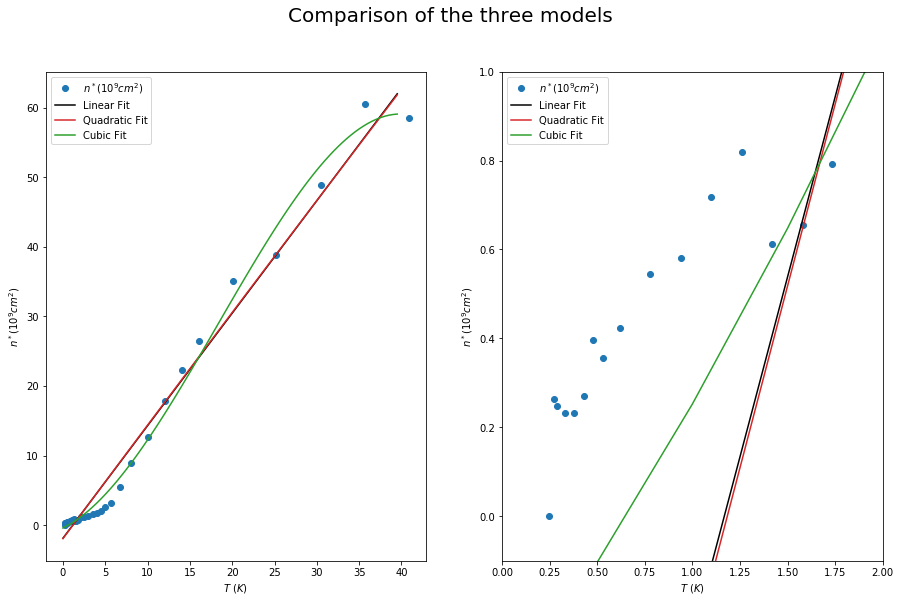

In [24]:
xarr = np.arange(0, 40, 0.5)

pl.figure(figsize=(15, 9))
pl.suptitle('Comparison of the three models', fontsize=20)

pl.subplot(121)
pl.plot(nam18reduced[tstr] , nam18reduced[nstr], '.', ms=12, label = nstr)
pl.plot(xarr, anypol(xarr, *lopt), c='k', label = 'Linear Fit')
pl.plot(xarr, anypol(xarr, *qopt), c='C3', label = 'Quadratic Fit')
pl.plot(xarr, anypol(xarr, *copt), c='C2', label = 'Cubic Fit')
pl.legend()
pl.ylabel(nstr)
pl.xlabel(tstr)


pl.subplot(122)
pl.plot(nam18reduced[tstr] , nam18reduced[nstr], '.', ms=12, label = nstr)
pl.plot(xarr, anypol(xarr, *lopt), c='k', label =  'Linear Fit')
pl.plot(xarr, anypol(xarr, *qopt), c='C3', label = 'Quadratic Fit')
pl.plot(xarr, anypol(xarr, *copt), c='C2', label = 'Cubic Fit')
pl.xlim(0,2)
pl.ylim(-.1,1)
pl.legend()
pl.ylabel(nstr)
pl.xlabel(tstr)


**Figure 2:** The graph shows our three different models on the same plot for the data shown in Figure 1. The plot on the left shows the full dataset, while the plot on the right shows just a selected region of the left plot in order to distinguish between the linear and quadratic fits.

# 5 *formally* compare the models with a test that returns a p-value assessment (NHRT) to determine which model is best. Sort the models from the best one to the worse one.

Taking as our null-hypothesis that **'The simpler model is more accurate'**, testing at a confidence level of $p < 0.05$ with a Likelihood-Ratio Test, we find the following:

In [25]:
lr_3to2 = model3.compare_lr_test(model2)
lr_3to1 = model3.compare_lr_test(model1)
lr_2to1 = model2.compare_lr_test(model1)

print('model degrees, \t Likelihood Ratio, \t p-value, \t Difference in degrees of freedom')
print('2 & 3:\t\t', lr_3to2, '\n1 & 3:\t\t', lr_3to1, '\n1 & 2:\t\t', lr_2to1)

model degrees, 	 Likelihood Ratio, 	 p-value, 	 Difference in degrees of freedom
2 & 3:		 (32.01784952536279, 1.5276246887173018e-08, 1.0) 
1 & 3:		 (32.04057153068926, 1.1027531159466854e-07, 2.0) 
1 & 2:		 (0.022722005326471617, 0.8801822372588882, 1.0)


Comparing the cubic fit to both the quadratic and linear fits, we find p-values lower than $10^{-7}$. Therefore, for the cubic fit, we reject the null-hypothesis and find that the cubic fit is the best for our data. Comparing the linear to the quadratic fit, there is not enough evidence to reject the null hypothesis ($p\sim 0.88$), so we find no evidence that the quadratic fit is better than the linear fit.

Ranking the three fits from best to worst:
 
1. Cubic fit
2. Linear fit
3. Quadratic fit



### Install emcee

In [26]:
!pip install emcee


     |████████████████████████████████| 61kB 3.1MB/s 


In [0]:
import emcee

# **PART** II Due Friday 10/25 at midnight

# 6. Create a column with made up uncertainties: draw them as gaussian random variables from a gaussian centered at 0 and with a standard deviation of 10

In [27]:
np.random.seed(500)
nam18reduced["uncertainties"] = np.random.normal(0, scale = 10, size = len(nam18reduced[nstr]))
nam18reduced.head()

,$T\ (K)$,$n^*(10^9cm^2)$,uncertainties
0,0.247,0.000000,-3.773636
1,0.270,0.264431,1.667589
2,0.290,0.247896,6.828024
3,0.330,0.232262,19.213788
4,0.379,0.233420,-1.970368


Text(0, 0.5, '$n^*(10^9cm^2)$')

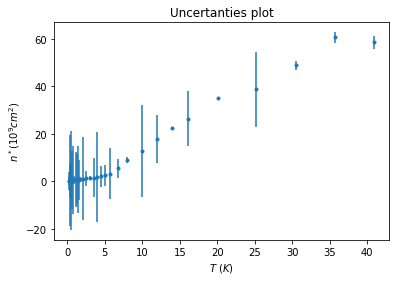

In [37]:
pl.errorbar(nam18reduced[tstr], nam18reduced[nstr], nam18reduced.uncertainties, fmt = '.')
pl.title('Uncertanties plot')
pl.xlabel(tstr)
pl.ylabel(nstr)

**Figure 3:** Plot of the dataset with uncertainties in a gaussian distribution around 0 with a standard deviation of 10.

# 7. Set up EMCEE for a MCMC model optimization

Create a log-likelihood function like in the example https://emcee.readthedocs.io/en/stable/tutorials/line/. Note that the model generatedin the emcee example is assuming a line model but also assuming that the uncertainties are underestimated! That is a really fun exrcise! however, you do not have to do this part: modify the likelihood function (and prior etc) removing the piece referring to the uncertainty underestimation. Set a prior that limits the slpe to positive values and the intercept to values between -10 and 10.

In [0]:
def log_likelihood(theta, x, y, yerr):
    m, b = theta
    model = m * x + b
    sigma2 = yerr**2
    return -0.5*np.sum((y-model)**2/sigma2 + np.log(sigma2))

In [0]:
def log_prior(theta):
  m, b = theta
  if 0.0 < m and -10.0 < b < 10.0:
    return 0.0
  return -np.inf

In [0]:
def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)

# 8 Run the emcee with 50 walkers and chains 3000 elements long

In [32]:
nll = lambda *args: -log_likelihood(*args)
initial = np.array([lopt[0], lopt[1]]) + 0.1*np.random.randn(2)
soln = minimize(nll, initial, args=(nam18reduced[tstr], nam18reduced[nstr], nam18reduced.uncertainties))
m_ml, b_ml = soln.x
print(b_ml, m_ml)

-1.2926144789448075 1.7865924956823307


In [33]:
print(lopt[0], lopt[1])

-1.8884450498625962 1.6175862596781871


In [38]:
pos = soln.x + 1e-2*np.random.randn(50, 2)
nwalkers = 50
ndim = 2

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(nam18reduced[tstr], nam18reduced[nstr], nam18reduced.uncertainties))
sampler.run_mcmc(initial_state = pos, nsteps = 3000, progress=True);


/usr/local/lib/python3.6/dist-packages/emcee/ensemble.py:258: RuntimeWarning: Initial state is not linearly independent and it will not allow a full exploration of parameter space
  category=RuntimeWarning,
100%|██████████| 3000/3000 [04:24<00:00, 11.35it/s]


# 9. plot the chains for slope and intercept, labelled accordingly. Remove from the chain the first 50 points. Discuss why that is a good idea.

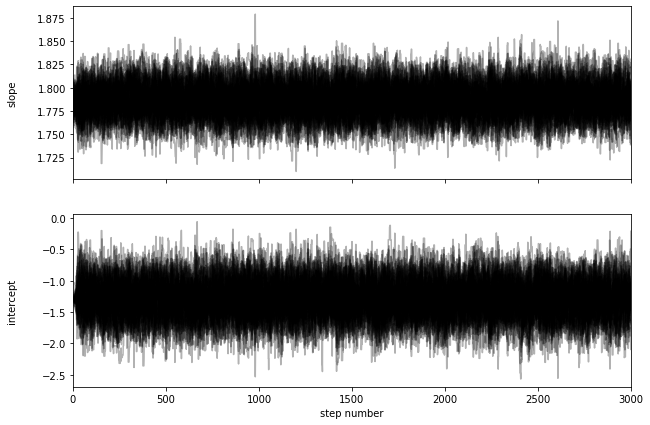

In [39]:
fig, axes = pl.subplots(2, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["slope", "intercept"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

**Figure 4:** Plots of the chains for the walkers over the slope and intercept parameters.

In [0]:
#removing the first 50 samples
flat_samples = sampler.get_chain(discard=50, thin=15, flat=True)

It is a good idea to remove the first 50 samples for the corner plots since during the first 50 steps, the walkers are still exploring the space in an outwards direction from the center, in general. Thus, for an accurate corner plot, we need to remove these samples, as they are not representative of the random motion of the walkers over the space.

# Install the corner module

In [41]:
!pip install corner
import corner


  Created wheel for corner: filename=corner-2.0.1-cp36-none-any.whl size=11643 sha256=0bebc290fc7fd47249fc339c0eabd20e00dfd4a279de42eb5b87a0706253a847
  Stored in directory: /root/.cache/pip/wheels/70/d8/e5/e0e7974a2a5757483ea5a180c937041cf6872dc9993d78234a
Successfully built corner


# 10 plot the "marginalized posterior distributions" with the corner plot package
label the axis "slope" and "intercept" appropriately

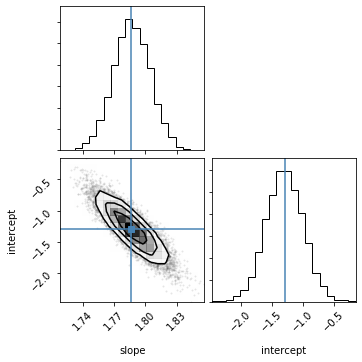

In [42]:
fig = corner.corner(flat_samples, labels=labels, truths=[m_ml, b_ml]);

**Figure 5:** Corner plot for the results of the MCMC for the slope and intercept parameters of the linear fit. The end mean value for each parameter is in the ballpark of the parameters returned for the other fitting methods of this assignment.

#  EC Repeat for a parabola fit (this should be very quick now that you did the line fit! you need to define a new slightly different likelihood and prior, )

In [0]:
def log_likelihood2(theta, x, y, yerr):
    a, b, c = theta
    model = a*x**2 + b*x + c
    sigma2 = yerr**2
    return -0.5*np.sum((y - model)**2/sigma2 + np.log(sigma2))

In [0]:
def log_prior2(theta):
  a, b, c = theta
  #define constrictions for parameters
  if -1.0 < a < 1.0 and -5.0 < b < 5 and -5.0 < c < 5.0:
    return 0.0
  return -np.inf

In [0]:
def log_probability2(theta, x, y, yerr):
    lp = log_prior2(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood2(theta, x, y, yerr)

In [46]:
nll2 = lambda *args: -log_likelihood2(*args)
initial2 = np.array([qopt[0], qopt[1], qopt[2]]) + 0.1*np.random.randn(3)
soln2 = minimize(nll2, initial2, args=(nam18reduced[tstr], nam18reduced[nstr], nam18reduced.uncertainties))
a, b, c = soln2.x
print(a, b, c)

-0.005438390339859769 1.9132103807662713 -1.5862171036348962


In [47]:
print(qopt[2], qopt[1], qopt[0])

-0.0005200414751138638 1.6353705163990266 -1.9344265724346519


In [48]:
pos2 = soln2.x + 1e-2*np.random.randn(50, 3)
nwalkers2 = 50
ndim2 = 3

sampler2 = emcee.EnsembleSampler(nwalkers2, ndim2, log_probability2, args=(nam18reduced[tstr], nam18reduced[nstr], nam18reduced.uncertainties))
sampler2.run_mcmc(initial_state = pos2, nsteps = 3000, progress=True);

/usr/local/lib/python3.6/dist-packages/emcee/ensemble.py:258: RuntimeWarning: Initial state is not linearly independent and it will not allow a full exploration of parameter space
  category=RuntimeWarning,
100%|██████████| 3000/3000 [06:03<00:00,  8.69it/s]


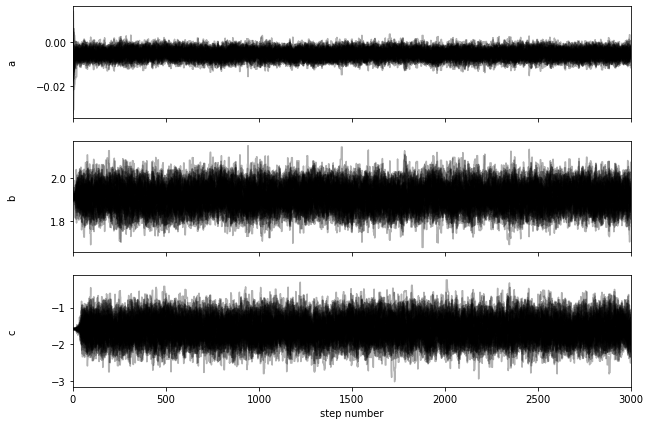

In [49]:
fig2, axes2 = pl.subplots(3, figsize=(10, 7), sharex=True)
samples2 = sampler2.get_chain()
labels2 = ['a', 'b', 'c']
for i in range(ndim2):
    ax = axes2[i]
    ax.plot(samples2[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples2))
    ax.set_ylabel(labels2[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes2[-1].set_xlabel("step number");

**Figure 6:** Plots of the chains for the walkers over the a, b, and c terms for the quadratic fit.

In [0]:
#removing the first 50 samples
flat_samples2 = sampler2.get_chain(discard=50, thin=15, flat=True)

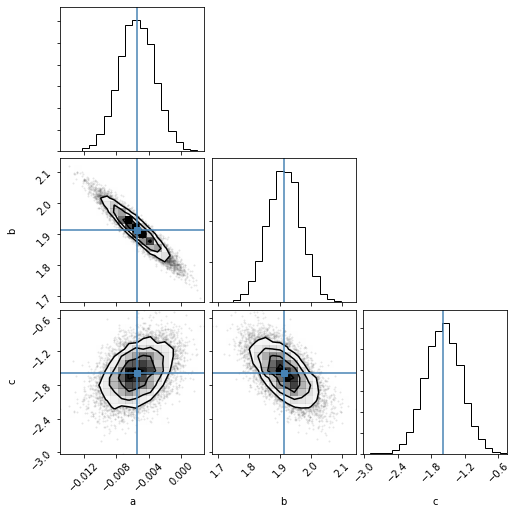

In [51]:
fig2 = corner.corner(flat_samples2, labels=labels2, truths=[a, b, c]);

**Figure 7:** Corner plot for the results of the MCMC for the a, b, and c parameters of the quadratic fit. The end mean value for each parameter is in the ballpark of the parameters returned for the other fitting methods of this assignment.